In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
df = pd.read_csv('fake_reg.csv')
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


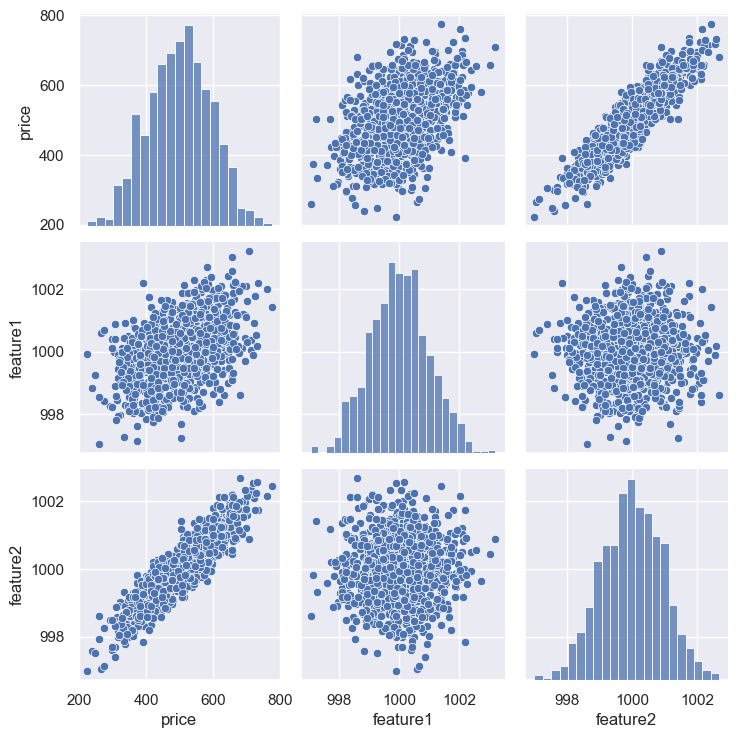

In [2]:
sns.pairplot(df)

2025-09-23 20:43:59.096440: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2025-09-23 20:43:59.096473: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2025-09-23 20:43:59.096479: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2025-09-23 20:43:59.096495: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-09-23 20:43:59.096504: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2025-09-23 20:43:59.339731: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


<Axes: >

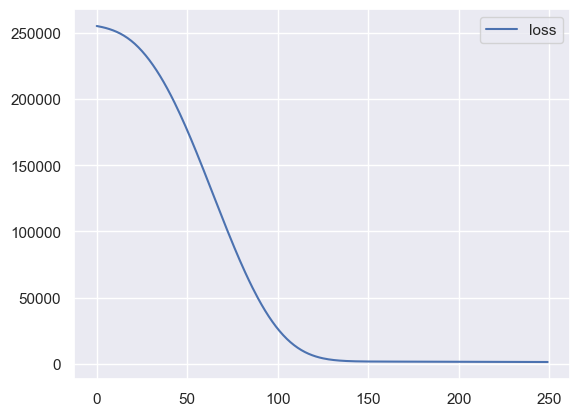

In [3]:
from sklearn.model_selection import train_test_split
X = df[['feature1', 'feature2']].values
y = df['price'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.preprocessing import MinMaxScaler # std, min&max vals
scaler = MinMaxScaler()
scaler.fit(X_train)
# between 0 and 1
scaled_train = scaler.transform(X_train)
scaled_test = scaler.transform(X_test)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

#model = Sequential([Dense(4, activation='relu'),
#                   Dense(2, activation='relu'),
#                   Dense(1)])

model = Sequential()
model.add(Dense(4, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1))
#model.compile(optimizer='rmsprop', loss='mse')
model.compile(optimizer='adam', loss='mse')
# epoch is one pass over entire dataset
model.fit(x=scaled_train, y=y_train, epochs=250, verbose=0)
pd.DataFrame(model.history.history).plot()

In [4]:
model.evaluate(scaled_test, y_test, verbose=0)

1134.5128173828125

In [5]:
model.evaluate(scaled_train, y_train, verbose=0)

1226.12841796875

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


<Axes: xlabel='Test True Y', ylabel='Pred'>

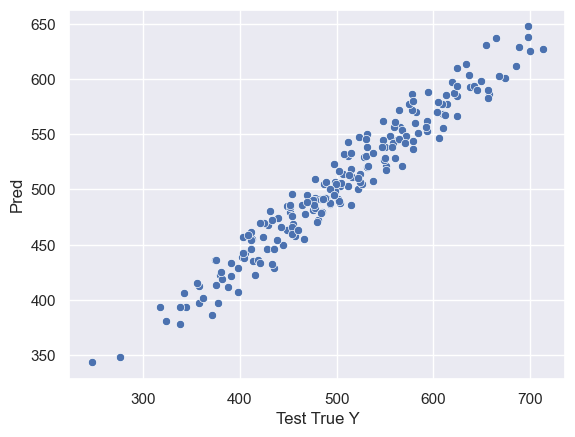

In [6]:
pred = model.predict(scaled_test)
pred = pd.Series(pred.reshape(200,))
pred_df = pd.DataFrame(y_test, columns=['Test True Y'])
pred_df = pd.concat([pred_df, pred], axis=1)
pred_df.columns=['Test True Y', 'Pred']
sns.scatterplot(x='Test True Y', y='Pred', data=pred_df)

In [7]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mean_absolute_error(pred_df['Test True Y'], pred_df['Pred'])

26.90682636295783

In [8]:
mean_squared_error(pred_df['Test True Y'], pred_df['Pred'])

1134.512902292804

In [9]:
mean_squared_error(pred_df['Test True Y'], pred_df['Pred']) ** 0.5

33.68253111470104